# Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends.

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

- To create a linear model that quantitatively relates bike demands with the significant variables 

- To know the accuracy of the model, i.e. how well these variables can predict bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
## Read the dataset and create the dataframe named df

df = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [5]:
## Check the rows and columns of the dataframe

df.shape

(730, 16)

In [6]:
## Check the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
## Describe the summary of the columns

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2:  Exploratory Data Analysis

Next Step is to perform EDA on the dataset to check for any missing values/drop unnecessary values/convert datatypes/finding the correlation among the variables etc

There are no NULL values in the dataset and most of the columns are numeric and appropriately defined hence column/datatype conversion is not required.

In [8]:
## Dropping the columns not required - instant, dteday, casual, registered

# instant - sequential column
# dteday - we already have yr column hence removing duplicate date column
# casual, registered - total count is being captured using cnt variable (target)

df.drop(columns=['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace=True)

In [9]:
## Check the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
## Check for the distinct values in season

df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
## Check for the distinct values in weathersit

df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
## Check for the distinct values in weekday 

df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [13]:
## Check for the distinct values in mnth

df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [14]:
## Checking first 5 rows 

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
## Checking the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
## Checking the summary of the data

df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 3: Visualising the Data

Another  important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Creating the pairplot of all the numeric variables

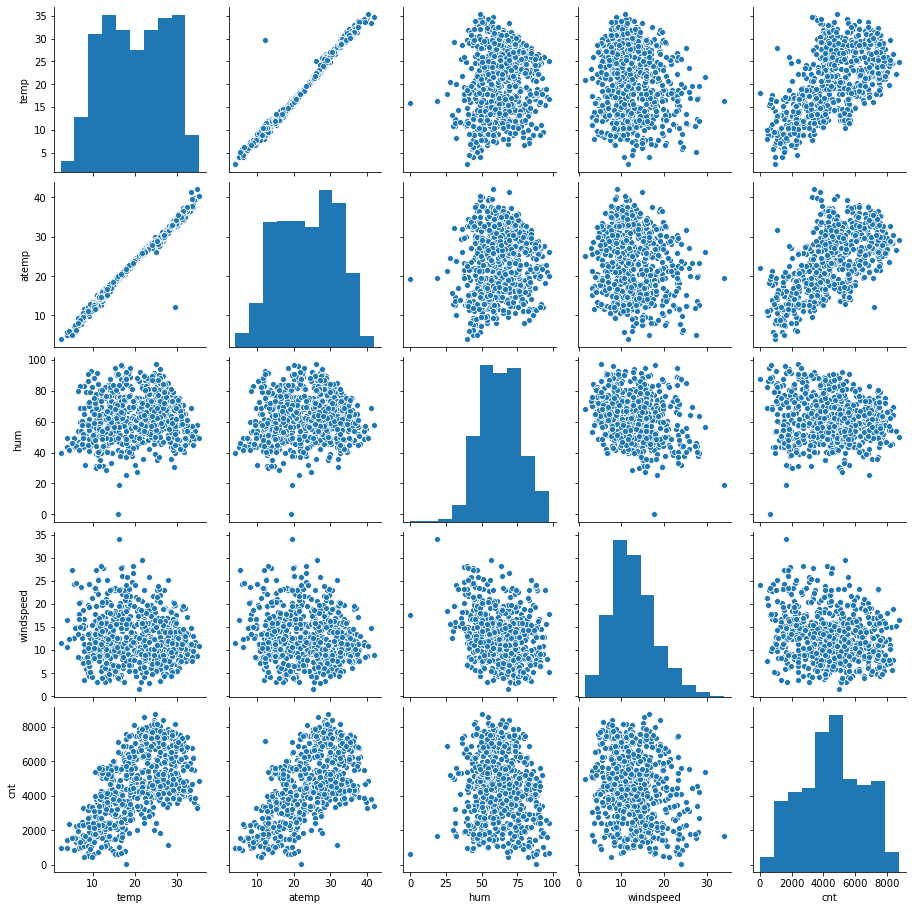

In [17]:
## Pairplots of numeric variables

sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

#### Inference 

- As we can see using above plot that there is some correlation between temp, atemp with cnt (target variable).
- temp and atemp also seems to be strongly correlated with each other so we can either drop one variable or select only one variable in model building to avoid multicollinearity.

#### Visualising Categorical Variables

Lets use the boxplot to plot the categorical variables like yr, season, holiday, mnth, weekday, workingday and weathersit.

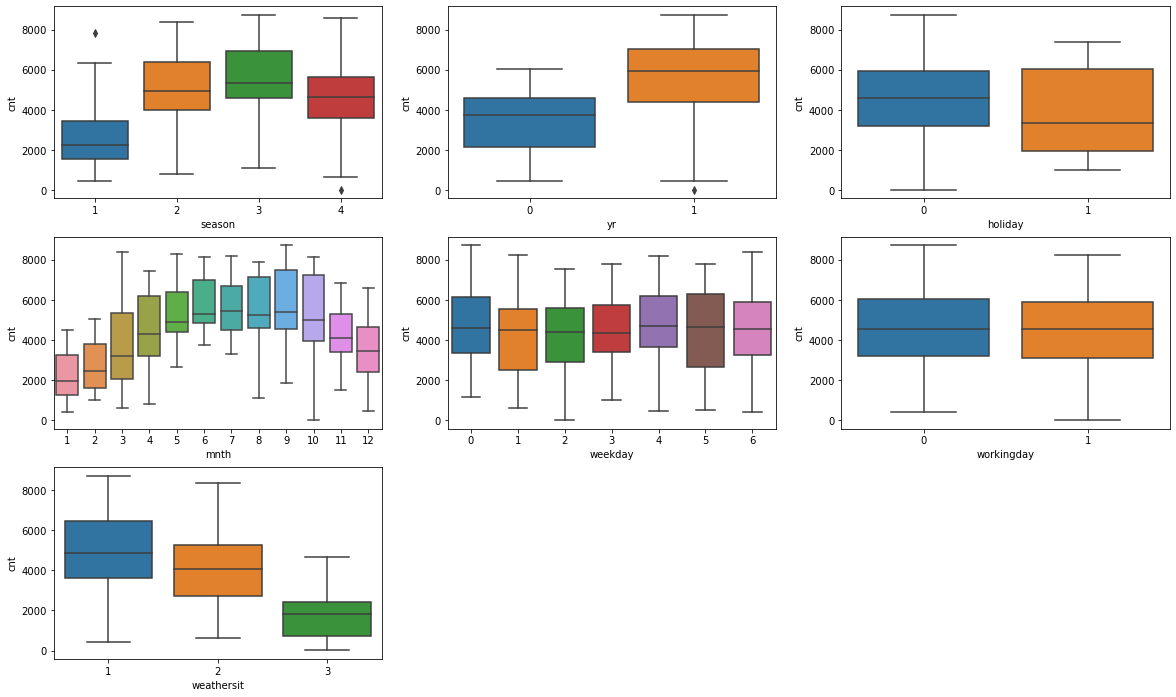

In [18]:
## Boxplot for categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Inference 

- Spring season has least bike demands while fall has the most.
- Yr 2019 has huge bike demands as compared to 2018.
- During holidays, the bike demand is less which is reasonable as more people tend to stay home.
- Mnth Jan has least bike demands in the US while July & September seems to have highest demands.
- Bike demand seems to be similar for the weekdays.
- Bike demands are the same for working and non-working days.
- When the weather is clear, the demand for bikes is high while in case of Light Snow & Rain, it is least.

#### Correlation using Heapmap

Lets see the correlation among the variables using Heatmap

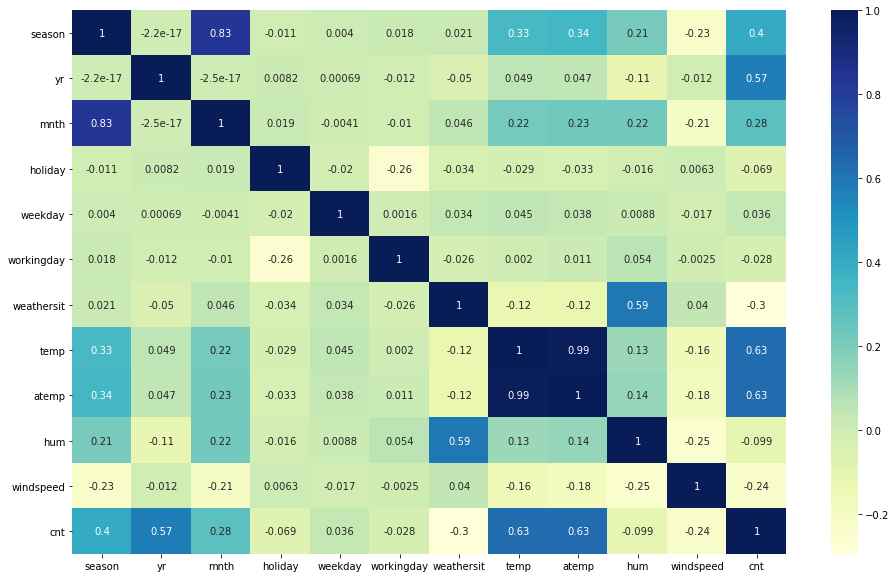

In [19]:
## Correlation using heatmap

plt.figure(figsize=[16, 10])
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Inference -

- Pretty Good correlation between target variable cnt and temp/atemp.
- yr column also has some correlation with cnt.
- windspeed (negative) and mnth (positive) is also correlated with cnt.
- temp and atemp are highly correlated with each other which is reasonable as they are more or less the same feature with same unit.

## Step 4: Data Preparation

- some of the variables like 'weathersit', 'season', 'mnth' and 'weekday' have values as 1, 2, 3, 4 which have specific labels associated with them. These numeric values associated with the labels may indicate that there is some order to them which is actually not the case.
- So, it is advisable to convert such feature values into categorical string values before proceeding with model building. 

In [20]:
## Converting season column to appropriate season categories 

df['season'] = df.season.apply(lambda x:  'spring' if x == 1 
                                     else 'summer' if x == 2 
                                     else 'fall'   if x == 3
                                     else 'winter' if x == 4
                                     else  null)

In [21]:
## Checking distinct values of season

df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [22]:
## Converting weathersit column to appropriate categories 

df['weathersit'] = df.weathersit.apply(lambda x:  'Clear' if x == 1 
                                             else 'Mist & Cloudy'  if x == 2 
                                             else 'Light Snow & Rain'   if x == 3
                                             else 'Heavy Snow & Rain' if x == 4
                                             else  null)

In [23]:
## Checking distinct values of weathersit

df.weathersit.value_counts()

Clear                463
Mist & Cloudy        246
Light Snow & Rain     21
Name: weathersit, dtype: int64

In [24]:
## Converting mnth column to appropriate month categories 

df['mnth'] = df.mnth.apply(lambda x:  'Jan' if x == 1 
                                 else 'Feb' if x == 2 
                                 else 'Mar' if x == 3
                                 else 'Apr' if x == 4
                                 else 'May' if x == 5
                                 else 'Jun' if x == 6
                                 else 'Jul' if x == 7
                                 else 'Aug' if x == 8
                                 else 'Sep' if x == 9
                                 else 'Oct' if x == 10
                                 else 'Nov' if x == 11
                                 else 'Nov' if x == 12
                                 else  null)

In [25]:
## Checking distinct values of mnth 

df.mnth.value_counts()

Nov    122
Oct     62
Jul     62
Jan     62
Aug     62
Mar     62
May     62
Sep     60
Jun     60
Apr     60
Feb     56
Name: mnth, dtype: int64

In [26]:
## Converting weekday column to appropriate weekday categories 

df['weekday'] = df.weekday.apply(lambda x:  'Mon' if x == 1
                                       else 'Tue' if x == 2
                                       else 'Wed' if x == 3
                                       else 'Thu' if x == 4
                                       else 'Fri' if x == 5
                                       else 'Sat' if x == 6
                                       else 'Sun' if x == 0
                                       else  null)

In [27]:
## Checking distinct values of weekday 

df.weekday.value_counts()

Tue    105
Mon    105
Fri    104
Sat    104
Thu    104
Wed    104
Sun    104
Name: weekday, dtype: int64

In [28]:
## Checking the first few rows

df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Dummy Variables

The variables season, mnth, weekday and weathersit are categorical variables so before modelling we will convert them into integer dummy variables of their k distinct categories using k-1 levels for each variable.

In [29]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_type'

season_type = pd.get_dummies(df['season'])

In [30]:
# Check the new dataset 'season_type'

season_type.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we drop one of the column lets say `fall` column, as the type of fall can be identified with the last there columns where — 
- `000` will correspond to `fall`
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`

In [31]:
# Let's drop the first column from season_type df using 'drop_first = True'

season_type = pd.get_dummies(df['season'], drop_first=True)

In [32]:
# Add the results to the original dataframe

df = pd.concat([df, season_type], axis=1)

In [33]:
# Now let's see the head of our dataframe.

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


Repeating same steps for other Categorical Variables.

In [34]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_type'

mnth_type = pd.get_dummies(df['mnth'])

In [35]:
## Check the new dataframe mnth_type

mnth_type.head()

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
## Drop the first column of the mnth_type dataframe using drop_first=True

mnth_type = pd.get_dummies(df['mnth'], drop_first = True)

In [37]:
## Add the results to the original dataframe

df = pd.concat([df, mnth_type], axis=1)

In [38]:
## Check the updated dataframe

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_type'

weekday_type = pd.get_dummies(df['weekday'])

In [40]:
## Check the new dataframe mnth_type

weekday_type.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [41]:
## Drop the first column of the mnth_type dataframe using drop_first=True

weekday_type = pd.get_dummies(df['weekday'], drop_first = True)

In [42]:
## Add the results to the original dataframe

df = pd.concat([df, weekday_type], axis=1)

In [43]:
## Check the updated dataframe

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_type'

weathersit_type = pd.get_dummies(df['weathersit'])

In [45]:
## Check the new dataframe mnth_type

weathersit_type.head()

,Clear,Light Snow & Rain,Mist & Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [46]:
## Drop the first column of the mnth_type dataframe using drop_first=True

weathersit_type = pd.get_dummies(df['weathersit'], drop_first = True)

In [47]:
## Add the results to the original dataframe

df = pd.concat([df, weathersit_type], axis=1)

In [48]:
## Check the updated dataframe

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow & Rain,Mist & Cloudy
0,spring,0,Jan,0,Mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Drop all the columns season, mnth, weekday & weathersit as we have created the dummies for it

df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [50]:
## Check the updated dataframe

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow & Rain,Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Splitting the Data into Training and Testing Sets

The first basic step for regression is to perform a train-test split, so we will divide the dataset into test & train datasets.

In [51]:
## Dividing the dataset into train and test data

np.random.seed(0) # to select same sample everytime
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [52]:
## Check the shape(rows & columns) of the test and train datasets

print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Rescaling the features

We will rescale the features to ease the interpretation and will use Min-Max Scaling for this case.

In [53]:
## Rescaling the features using MinMaxScaler method

scaler = MinMaxScaler()

In [54]:
## Checking the info of the dataframe - numerical columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   spring             730 non-null    uint8  
 9   summer             730 non-null    uint8  
 10  winter             730 non-null    uint8  
 11  Aug                730 non-null    uint8  
 12  Feb                730 non-null    uint8  
 13  Jan                730 non-null    uint8  
 14  Jul                730 non-null    uint8  
 15  Jun                730 non-null    uint8  
 16  Mar                730 non

In [55]:
# Apply scaler() to all the columns except the binary (with only 0 & 1 value) and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
# Check the first 5 rows of the train dataset

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow & Rain,Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [57]:
# Check the summary of the train dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow & Rain,Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
## Correlation of train dataset using heatmap

##plt.figure(figsize=[16, 10])
##sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
#plt.show()

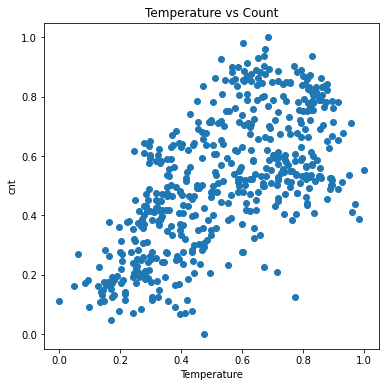

In [59]:
## Highly correlated variable with cnt is temp/atemp. 
## Scatter Plot for temp vs cnt

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('cnt')
plt.show()

### Dividing into X and Y sets for the model building

In [60]:
## Dividing the train dataset into X and Y

y_train = df_train.pop('cnt')
X_train = df_train

## Step 6: Data Modelling and Evaluation

### Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (Recursive Feature Elimination). We will start the modelling using 15 feature variables and will select final model with 10 feature variables.

In [61]:
## Fitting the model

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
## RFE using only 15 feature variables

rfe = RFE(lm, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [63]:
# Get the feature vraiables list - 15 selected feature variables have value = True and other variables with False value 
# have different rankings associated with them

list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 11),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Snow & Rain', True, 1),
 ('Mist & Cloudy', True, 1)]

In [64]:
## Get all the RFE supported variables

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow & Rain',
       'Mist & Cloudy'],
      dtype='object')

In [65]:
## Get all the non-RFE supported variables

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [66]:
##  Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [67]:
## Checking the VIF for the feature variables

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.26
2,temp,18.21
5,spring,5.35
4,windspeed,4.71
7,winter,3.99
6,summer,2.81
11,Nov,2.42
9,Jan,2.32
14,Mist & Cloudy,2.32
0,yr,2.09


VIF of `hum` and `temp` column is pretty high so we can drop one of them and rebuild our model.
But before that we will fit the model and check the R-square, adjusted R-square and p-values.

In [68]:
## First model

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_rfe)

## Running the model
lm1 = sm.OLS(y_train, X_train_lm1).fit()

In [69]:
## Check the summary

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.39e-190
Time:                        20:39:09   Log-Likelihood:                 516.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     494   BIC:                            -932.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3320      0.037      9.067      0.000       0.260       0.404
yr                    0.2307      0.008     28.627      0.000       0.215       0.247
holiday              -0.0887      0.025     -3.483      0.001      -0.139      -0.039
temp                  0.4640      0.038     12.205      0.000       0.389       0.539
hum                  -0.1582      0.038     -4.210      0.000      -0.232      -0.084
windspeed            -0.1896      0.026     -7.393      0.000      -0.240      -0.139
spring               -0.0519      0.022     -2.371      0.018      -0.095      -0.009
summer                0.0374      0.015      2.428      0.016       0.007       0.068
winter                0.1017      0.018      5.716      0.000       0.067       0.137
Feb                  -0.0360      0.021     -1.679      0.094      -0.078       0.006
Jan                  -0.0630      0.021     -2.970      0.003      -0.105      -0.021
Jul                  -0.0545      0.018     -3.000      0.003      -0.090      -0.019
Nov                  -0.0462      0.016     -2.953      0.003      -0.077      -0.015
Sep                   0.0734      0.017      4.353      0.000       0.040       0.106
Light Snow & Rain    -0.2495      0.026     -9.481      0.000      -0.301      -0.198
Mist & Cloudy        -0.0562      0.010     -5.382      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       71.832   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.429
Skew:                          -0.726   Prob(JB):                     4.89e-39
Kurtosis:                       5.489   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- There are columns with high p-value and low VIF and columns with low p-value but high VIF. We will first drop the columns with high p-value and low VIF.

- Since the p-value of column `Feb` is high, we will drop it first and check the VIF again.

In [70]:
# Dropping Feb Feature variable

X_train_new = X_train_rfe.drop(['Feb'], axis=1)

In [71]:
## Checking the VIF for the feature variables

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.73
2,temp,17.73
4,windspeed,4.69
5,spring,4.34
7,winter,3.99
6,summer,2.81
13,Mist & Cloudy,2.32
10,Nov,2.29
0,yr,2.09
8,Jan,1.73


In [72]:
## Second model

# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_new)

## Running the model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [73]:
# Check the summary

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.40e-190
Time:                        20:39:10   Log-Likelihood:                 514.70
No. Observations:                 510   AIC:                            -999.4
Df Residuals:                     495   BIC:                            -935.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3202      0.036      8.894      0.000       0.249       0.391
yr                    0.2303      0.008     28.539      0.000       0.214       0.246
holiday              -0.0917      0.025     -3.605      0.000      -0.142      -0.042
temp                  0.4797      0.037     12.994      0.000       0.407       0.552
hum                  -0.1597      0.038     -4.242      0.000      -0.234      -0.086
windspeed            -0.1888      0.026     -7.348      0.000      -0.239      -0.138
spring               -0.0615      0.021     -2.904      0.004      -0.103      -0.020
summer                0.0408      0.015      2.662      0.008       0.011       0.071
winter                0.1030      0.018      5.786      0.000       0.068       0.138
Jan                  -0.0441      0.018     -2.449      0.015      -0.079      -0.009
Jul                  -0.0554      0.018     -3.046      0.002      -0.091      -0.020
Nov                  -0.0389      0.015     -2.584      0.010      -0.068      -0.009
Sep                   0.0750      0.017      4.448      0.000       0.042       0.108
Light Snow & Rain    -0.2483      0.026     -9.421      0.000      -0.300      -0.196
Mist & Cloudy        -0.0559      0.010     -5.350      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.356   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.882
Skew:                          -0.684   Prob(JB):                     1.57e-36
Kurtosis:                       5.426   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After dropping the column `Jan` , there isn't seem to be much difference in the VIF, hence we will now drop `hum` column and check the VIF again since `temp` seems to be a significant/important variable as per business understanding/knowledge.

In [74]:
# Dropping hum Feature variable

X_train_new = X_train_new.drop(['hum'], axis=1)

In [75]:
## Checking the VIF for the feature variables

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.63
6,winter,2.90
4,spring,2.82
5,summer,2.22
9,Nov,2.16
0,yr,2.07
7,Jan,1.64
8,Jul,1.59
12,Mist & Cloudy,1.56


The VIF has dropped significantly but still the VIF of `temp` column is more than 5 which is not acceptable. We will rebuild the model and check the summary

In [76]:
## Third Model

# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new)

## Running the model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [77]:
# Check the summary

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.10e-187
Time:                        20:39:10   Log-Likelihood:                 505.60
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     496   BIC:                            -923.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2465      0.032      7.687      0.000       0.183       0.309
yr                    0.2343      0.008     28.738      0.000       0.218       0.250
holiday              -0.0916      0.026     -3.540      0.000      -0.142      -0.041
temp                  0.4378      0.036     12.102      0.000       0.367       0.509
windspeed            -0.1583      0.025     -6.310      0.000      -0.208      -0.109
spring               -0.0719      0.021     -3.360      0.001      -0.114      -0.030
summer                0.0332      0.015      2.149      0.032       0.003       0.064
winter                0.0889      0.018      4.997      0.000       0.054       0.124
Jan                  -0.0500      0.018     -2.741      0.006      -0.086      -0.014
Jul                  -0.0504      0.018     -2.730      0.007      -0.087      -0.014
Nov                  -0.0434      0.015     -2.841      0.005      -0.073      -0.013
Sep                   0.0681      0.017      3.994      0.000       0.035       0.102
Light Snow & Rain    -0.2929      0.025    -11.920      0.000      -0.341      -0.245
Mist & Cloudy        -0.0815      0.009     -9.374      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.055   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.775
Skew:                          -0.702   Prob(JB):                     6.77e-39
Kurtosis:                       5.510   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will drop `winter` column as it has high p-value.

In [78]:
# Dropping winter Feature variable

X_train_new = X_train_new.drop(['winter'], axis=1)

In [79]:
## Checking the VIF for the feature variables

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,4.38
4,spring,2.36
0,yr,2.06
5,summer,1.91
6,Jan,1.62
11,Mist & Cloudy,1.53
7,Jul,1.49
9,Sep,1.34
8,Nov,1.33


VIF values are less than 5 for all the feature variables. We will build another model and check the R-square, adjusted R-square and p-values of the coefficients.

In [80]:
## Fourth model

# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new)

## Running the model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

In [81]:
# Check the summary

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.39e-183
Time:                        20:39:10   Log-Likelihood:                 493.07
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     497   BIC:                            -905.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3480      0.025     13.702      0.000       0.298       0.398
yr                    0.2362      0.008     28.335      0.000       0.220       0.253
holiday              -0.0888      0.026     -3.355      0.001      -0.141      -0.037
temp                  0.3458      0.032     10.846      0.000       0.283       0.408
windspeed            -0.1608      0.026     -6.262      0.000      -0.211      -0.110
spring               -0.1451      0.016     -9.100      0.000      -0.176      -0.114
summer               -0.0147      0.012     -1.185      0.237      -0.039       0.010
Jan                  -0.0591      0.019     -3.180      0.002      -0.096      -0.023
Jul                  -0.0733      0.018     -4.005      0.000      -0.109      -0.037
Nov                  -0.0255      0.015     -1.678      0.094      -0.055       0.004
Sep                   0.0490      0.017      2.881      0.004       0.016       0.082
Light Snow & Rain    -0.2849      0.025    -11.348      0.000      -0.334      -0.236
Mist & Cloudy        -0.0811      0.009     -9.120      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       54.247   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.116
Skew:                          -0.579   Prob(JB):                     1.84e-27
Kurtosis:                       5.110   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will drop `summer` column as it has high p-value.

In [82]:
# Dropping summer Feature variable

X_train_new = X_train_new.drop(['summer'], axis=1)

In [83]:
## Checking the VIF for the feature variables

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,3.97
4,spring,2.12
0,yr,2.05
5,Jan,1.62
10,Mist & Cloudy,1.52
6,Jul,1.34
7,Nov,1.21
8,Sep,1.21
9,Light Snow & Rain,1.06


VIF is again under acceptable limit which is 5.

In [84]:
## Fifth model

# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new)

## Running the model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [85]:
# Check the summary

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.83e-184
Time:                        20:39:10   Log-Likelihood:                 492.35
No. Observations:                 510   AIC:                            -960.7
Df Residuals:                     498   BIC:                            -909.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3368      0.024     14.289      0.000       0.290       0.383
yr                    0.2363      0.008     28.325      0.000       0.220       0.253
holiday              -0.0887      0.026     -3.349      0.001      -0.141      -0.037
temp                  0.3534      0.031     11.310      0.000       0.292       0.415
windspeed            -0.1645      0.025     -6.454      0.000      -0.215      -0.114
spring               -0.1364      0.014     -9.643      0.000      -0.164      -0.109
Jan                  -0.0570      0.019     -3.078      0.002      -0.093      -0.021
Jul                  -0.0677      0.018     -3.827      0.000      -0.102      -0.033
Nov                  -0.0172      0.014     -1.277      0.202      -0.044       0.009
Sep                   0.0558      0.016      3.482      0.001       0.024       0.087
Light Snow & Rain    -0.2819      0.025    -11.282      0.000      -0.331      -0.233
Mist & Cloudy        -0.0813      0.009     -9.131      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       51.044   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.641
Skew:                          -0.558   Prob(JB):                     5.72e-25
Kurtosis:                       5.002   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will drop `Nov` column as it has high p-value.

In [86]:
# Dropping Nov Feature variable

X_train_new = X_train_new.drop(['Nov'], axis=1)

In [87]:
## Checking the VIF for the feature variables

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,3.82
4,spring,2.11
0,yr,2.04
5,Jan,1.60
9,Mist & Cloudy,1.50
6,Jul,1.33
7,Sep,1.20
8,Light Snow & Rain,1.06
1,holiday,1.03


VIF is almost similar to that of previous model and is under acceptable limit.

In [88]:
## Sixth model

# Adding a constant variable 
X_train_lm6 = sm.add_constant(X_train_new)

## Running the model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

In [89]:
# Check the summary

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.56e-185
Time:                        20:39:10   Log-Likelihood:                 491.52
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3193      0.019     16.630      0.000       0.282       0.357
yr                    0.2361      0.008     28.288      0.000       0.220       0.252
holiday              -0.0920      0.026     -3.489      0.001      -0.144      -0.040
temp                  0.3744      0.027     14.069      0.000       0.322       0.427
windspeed            -0.1605      0.025     -6.341      0.000      -0.210      -0.111
spring               -0.1305      0.013     -9.750      0.000      -0.157      -0.104
Jan                  -0.0511      0.018     -2.849      0.005      -0.086      -0.016
Jul                  -0.0694      0.018     -3.930      0.000      -0.104      -0.035
Sep                   0.0577      0.016      3.613      0.000       0.026       0.089
Light Snow & Rain    -0.2807      0.025    -11.233      0.000      -0.330      -0.232
Mist & Cloudy        -0.0808      0.009     -9.080      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       49.193   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.324
Skew:                          -0.540   Prob(JB):                     4.95e-24
Kurtosis:                       4.971   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping `Jan` column having p-value = 0.005 which is just at par buts lets drop and see the parameters.

In [90]:
# Dropping Jan Feature variable

X_train_new = X_train_new.drop(['Jan'], axis=1)

In [91]:
## Checking the VIF for the feature variables

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,3.82
0,yr,2.03
4,spring,1.52
8,Mist & Cloudy,1.48
5,Jul,1.33
6,Sep,1.20
7,Light Snow & Rain,1.06
1,holiday,1.03


VIF is again similar to that of previous model and is under acceptable limit.

In [92]:
## Seventh model

# Adding a constant variable 
X_train_lm7 = sm.add_constant(X_train_new)

## Running the model
lm7 = sm.OLS(y_train, X_train_lm7).fit()

In [93]:
# Check the summary

lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.40e-185
Time:                        20:39:10   Log-Likelihood:                 487.41
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     500   BIC:                            -912.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3086      0.019     16.274      0.000       0.271       0.346
yr                    0.2353      0.008     28.011      0.000       0.219       0.252
holiday              -0.0924      0.027     -3.477      0.001      -0.145      -0.040
temp                  0.3896      0.026     14.839      0.000       0.338       0.441
windspeed            -0.1516      0.025     -5.993      0.000      -0.201      -0.102
spring               -0.1454      0.012    -11.712      0.000      -0.170      -0.121
Jul                  -0.0736      0.018     -4.154      0.000      -0.108      -0.039
Sep                   0.0565      0.016      3.511      0.000       0.025       0.088
Light Snow & Rain    -0.2783      0.025    -11.067      0.000      -0.328      -0.229
Mist & Cloudy        -0.0820      0.009     -9.166      0.000      -0.100      -0.064
==============================================================================
Omnibus:                       46.958   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.026
Skew:                          -0.514   Prob(JB):                     4.25e-23
Kurtosis:                       4.947   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model looks quite decent as 

- p-value for all the variables is less than  0.005 
- R-square and adjsuted R-square is 0.83 
- There is very low correlation among the feature variables i.e. VIF < 5.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [94]:
## Check the shape of the rfe selected model

print(X_train_lm2.shape)

(510, 15)


In [95]:
## Predicting the trained model on y_train dataset

y_train_pred = lm2.predict(X_train_lm2)

Text(0.5, 0, 'Errors')

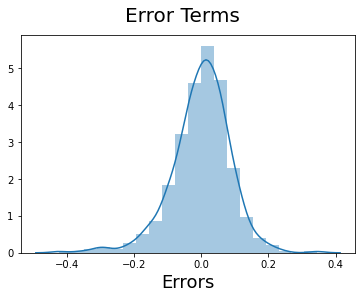

In [96]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### Inference - 
The errors terms are normally distributed with mean value = 0 that is, our assumption is true and we can proceed with next steps which to make predictions.

## Making Predictions

#### Applying the scaling on the test sets

In [97]:
## Rescaling the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [98]:
## Dividing the test dataset into X & y

y_test = df_test.pop('cnt')
X_test = df_test

In [99]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
## Check the first few rows of the dataset

X_test_new.head()

,const,yr,holiday,temp,windspeed,spring,Jul,Sep,Light Snow & Rain,Mist & Cloudy
184,1.0,0,1,0.831783,0.084219,0,1,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0


In [101]:
# Making predictions on final trained model

y_test_pred = lm7.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

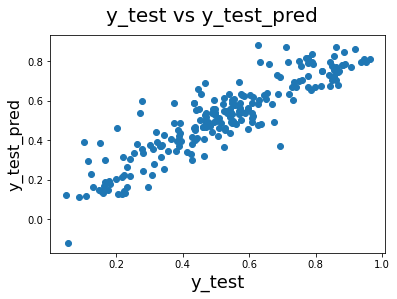

In [102]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [103]:
## Checking the R2 score on the test dataset

r2_score(y_true=y_test, y_pred=y_test_pred)

0.8030833511913681

#### Inference -

R2 Score of test dataset is pretty good and close to R-square or adjusted R-square of our traing dataset, hence we could say that our model has decent predictive capability.

In [104]:
lm7.params

const                0.308588
yr                   0.235272
holiday             -0.092388
temp                 0.389574
windspeed           -0.151598
spring              -0.145365
Jul                 -0.073595
Sep                  0.056472
Light Snow & Rain   -0.278315
Mist & Cloudy       -0.082045
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.3086 + 0.2353 \times  yr - 0.0924 \times holiday + 0.3896 \times temp − 0.1516 \times windspeed - 0.1454 \times spring - 0.0736 \times Jul + 0.0565 \times Sep - 0.2783 \times LightSnowandRain − 0.0820 \times MistandCloudy  $

Based on our final model behaviour on the test dataset, we could say that -

- Our model well explains 80% of bike demands in US based on R-Square, adjusted R-square or R2 score.
- Coefficients of these feature variables in final model explains the factors affecting daily bike demands.

The top 3 features contributing significantly towards explaining the demand of the shared bikes are -

- temp (0.3896) 
- weathersit - Light Snow & Rain (-0.2783) 
- yr (0.2353)